## Final Project - Statistics for Data Science with Python
Amy Feldman, June 2021

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy
# !pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm

In [3]:
# Task 3: Load Dataset from Boston Housing Agency
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

[Text(0.5, 1.0, 'Box Plot for Median Value of Owner-Occupied Homes')]

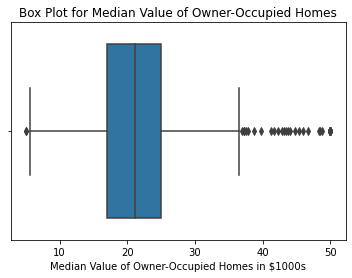

In [6]:
# Task 4a: For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x="MEDV", data=boston_df)
ax.set(xlabel='Median Value of Owner-Occupied Homes in $1000s')
ax.set(title='Box Plot for Median Value of Owner-Occupied Homes')

**Interpretation of findings**:The boxplot shows that the median of all *Median Values of Owner-Occupied Homes* is just over 20 (21.2 to be exact) - i.e. $21,200). We see a fairly normal distribution given the symmetry of the interquartile ranges on either side of the median value. There is a slight right skew in the distribution though as shown by the longer tail of outliers on the righthand side (upper end) of the plot.

Text(0, 0.5, 'Count')

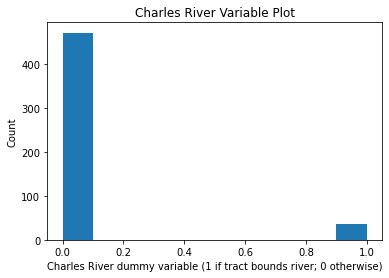

In [29]:
# Task 4b: Provide a  histogram for the Charles river variable
pyplot.hist(boston_df['CHAS'])
pyplot.title('Charles River Variable Plot')
pyplot.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
pyplot.ylabel('Count')

**Interpretation of findings:** The histogram shows that the Charles River variable takes only one of two values, 0 or 1, indicating that it is a dummy variable. There are well over 400 instances of a 0 value, while there are less than 100 instanecs of 1; Since a value of 1 represnts an instance o fa tract bounding a river, this histogram suggests that there are less instances of a tract bounding a river than the alternative.

[Text(0, 0.5, 'Median Value of Owner-Occupied Homes in $1000s')]

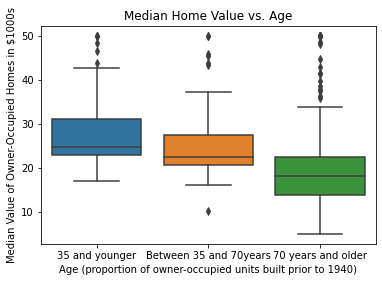

In [17]:
# Task 4c: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
bin_labels_3 = ['35 and younger', 'Between 35 and 70years','70 years and older']
boston_df["qbin"] = pd.cut(boston_df["AGE"],
                           [0,35,70,100],
                           labels=bin_labels_3)
ax2=sns.boxplot(x="qbin", y="MEDV", data=boston_df);
ax2.set(title="Median Home Value vs. Age")
ax2.set(xlabel='Age (proportion of owner-occupied units built prior to 1940)')
ax2.set(ylabel='Median Value of Owner-Occupied Homes in $1000s')

**Interpretation of findings:** Based on the age groupings shown in the box plots, the **Median Value of Owner Occupied Homes** decreases as **Age** increases. Through the boxplots, we can also interpret a clear right-skew in the distribution of the data for homes in the _35 or less_ and _Between 35 and 70_ age groups, while the _70 or above_ age group has more of a normal distribution with only a slight right skew.

[Text(0, 0.5, 'Proportion of Non-Retail Business Acres per Town')]

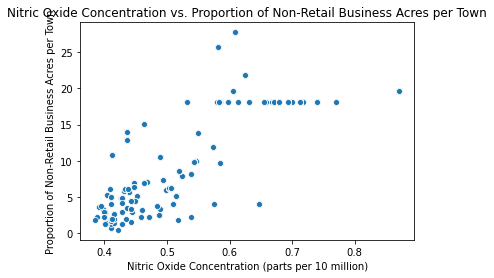

In [19]:
# Task 4e: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax3 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax3.set(title ='Nitric Oxide Concentration vs. Proportion of Non-Retail Business Acres per Town')
ax3.set(xlabel = 'Nitric Oxide Concentration (parts per 10 million)')
ax3.set(ylabel = 'Proportion of Non-Retail Business Acres per Town')

**Interpretation of Findings:** The scatterplot shows that as _nitric oxide concentration increass, _proportion of non-retail business acres per town_ also increases, indicating a potential direct correlation or potential positive relationship between these two variables.

Text(0, 0.5, 'Count')

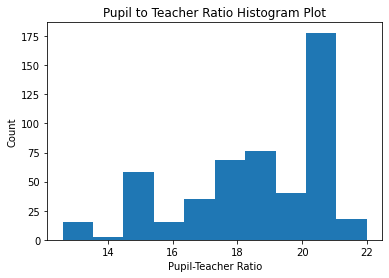

In [28]:
# Task 4f: Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Pupil to Teacher Ratio Histogram Plot')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Count')

**Interpretation of Results:** The histogram for the _pupil to teacher ratio_ varible indicates a mode of about 21 and a left-skewed data distribution.

In [71]:
# Task 5a: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river compared to those that are not")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river compared to those that are not")
-   α = 0.05


In [10]:
#Task 5a continued: T-Test for Independent Samples:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we can reject the null hypothesis and can conclude that there is a statistically significant difference in median value of houses bounded by the Charles river compared to those that are not.

In [78]:
# Task 5b: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in **median value of houses** for each **proportion of owner occupied units built prior to 1940**")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in **median value of houses** for each **proportion of owner occupied units built prior to 1940**")
-   α = 0.05

In [11]:
# Grouping age data for ANOVA test
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 or less'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 or above'

In [12]:
#Set ANOVA Sample Groups
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 or less']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_above = boston_df[boston_df['age_group'] == '70 or above']['MEDV']

In [13]:
#One-way ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_above)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than the alpha value 0.05, we can reject the null hypothesis and conclude that at least one of the means differ for the proportions of owner occupied units built prior to 1940.

In [ ]:
# Task 5c: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


State the hypothesis

-   $H_0$: Nitric oxide concentration is NOT correlated with proportion of non-retail business acres per town
-   $H_1$: Nitric oxide concentration is correlated with proportion of non-retail business acres per town
-   α = 0.05

In [99]:
# Pearson Correlation Test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value (with two-tail significance) is less than 0.05, we can reject the null hypothesis and conclude that a potential relationship exists between nitric oxide concentration and proportion of non-retail business acres per town.

In [100]:
#Task 5d: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the Hypothesis

- $𝐻0:β1  = 0$ (Weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
- $𝐻1:β1$ is not equal to 0 (Weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)
- α = 0.05

In [14]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           1.21e-08
Time:                        20:49:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** With a p-value less than the alpha value of 0.05, we can reject the null hypothesis and conclude that there is a correlation between weighted distance to the five Boston employment centres and median value of owner occupied homes. In other words, weighted distance to the five Boston employment centres does have an effect on median value of owne roccupied homes.

Coefficient Explanation: More specifically, using the Coefficient on "DIS", It appears as though each one unit increase in weighted distance to the five Boston employment centers is associated with a median home value increase of 1.09 units.